In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(y_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train=x_train/255
x_test=x_test/255

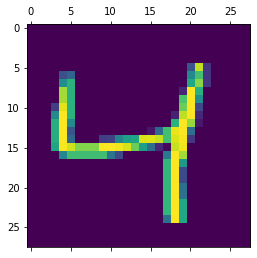

In [8]:
plt.matshow(x_train[2])

In [9]:
y_train[2]

4

In [10]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_train_flattened.shape

(60000, 784)

In [12]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x_test_flattened.shape

(10000, 784)

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
                 ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4689 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9255


In [15]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9259


[0.26555606722831726, 0.9258999824523926]

In [16]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([1.8265244e-02, 2.1565337e-07, 5.8450840e-02, 9.4465524e-01,
       1.1081754e-03, 7.2913647e-02, 2.0315558e-06, 9.9975520e-01,
       7.2948664e-02, 6.0908574e-01], dtype=float32)

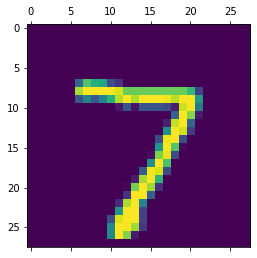

In [17]:
plt.matshow(x_test[0])

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    4,    7,    2,    4,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   6,    8,  929,   16,    9,    3,   11,    9,   37,    4],
       [   2,    0,   22,  930,    0,   13,    2,   11,   22,    8],
       [   1,    2,    2,    2,  903,    0,   16,    5,    9,   42],
       [   9,    3,    3,   45,    7,  748,   18,    8,   44,    7],
       [  10,    3,    6,    1,    7,    8,  917,    2,    4,    0],
       [   1,    5,   23,    6,    4,    0,    0,  957,    3,   29],
       [   7,    8,    7,   20,    8,   15,   10,   12,  881,    6],
       [  11,    7,    1,   12,   19,    5,    0,   26,    8,  920]])>

In [22]:
import seaborn as sn

Text(114.0, 0.5, 'actual Value')

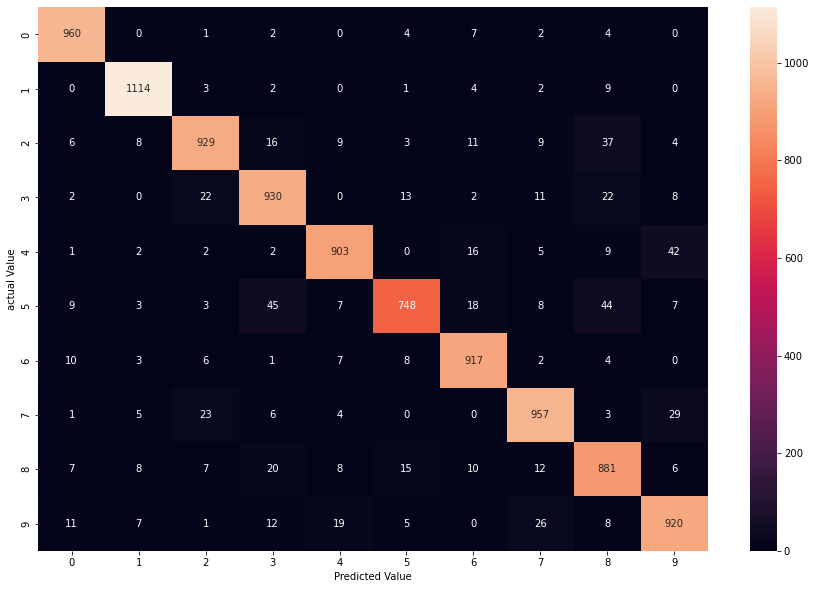

In [23]:
plt.figure(figsize=(15,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('actual Value')

In [24]:
# with hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
                 ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2748 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1275 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9844


In [25]:
#  Direct flatten the traning data
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")

                         ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2684 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1208 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0834 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9837
